# Analisi dati COVID Italia

## Importo dati

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d as filt
path = '/home/stella/Documents/fun/COVID-19/'
giorni = ['20200224','20200225','20200226','20200227','20200228',
          '20200229','20200301','20200302','20200303','20200304',
          '20200305','20200306','20200307','20200308','20200309',
          '20200310','20200311','20200312','20200313','20200314',
          '20200315','20200316','20200317','20200318','20200319', 
          '20200320','20200321','20200322','20200323','20200324',
          '20200325','20200326','20200327','20200328', '20200329',
         '20200330', '20200331', '20200401', '20200402', '20200403',
         '20200404', '20200405', '20200406', '20200407', '20200408',
         '20200409', '20200410', '20200411', '20200412', '20200413',
         '20200414', '20200415', '20200416', '20200417', '20200418',
         '20200419', '20200420', '20200421', '20200422', '20200423',
         '20200424', '20200425', '20200426', '20200427', '20200428',
         '20200429', '20200430', '20200501', '20200502', '20200503',
         '20200504', '20200505', '20200506', '20200507', '20200508',
         '20200509', '20200510', '20200511', '20200512', '20200513',
         '20200514', '20200515', '20200516', '20200517', '20200518',
          '20200519', '20200520', '20200521', '20200522', '20200523',
         '20200524']
ticklabels = [giorno[6:] for giorno in giorni]
figpath = './figures/'
sns.set()

In [2]:
naz = pd.read_csv(path +'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [3]:
province = pd.read_csv(path + f'dati-province/dpc-covid19-ita-province-{giorni[-1]}.csv')

In [4]:
regioni = pd.read_csv(path + f'dati-regioni/dpc-covid19-ita-regioni-{giorni[-1]}.csv')

## Analisi Nazionale

In [5]:
naz.keys()

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

### Andamento numero di casi

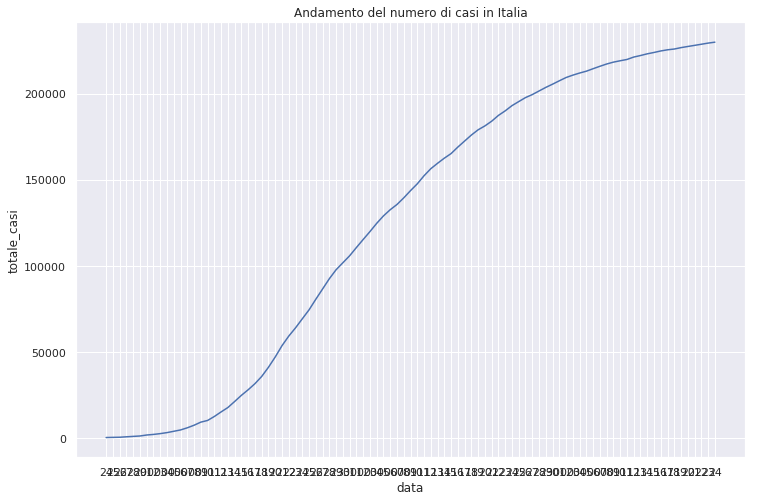

In [6]:
plt.figure(figsize=(12,8))
plot = sns.lineplot(x=naz['data'], y=naz['totale_casi'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di casi in Italia')
plt.savefig(figpath + 'cum_casi_italia.png')

### Andamento numero di deceduti

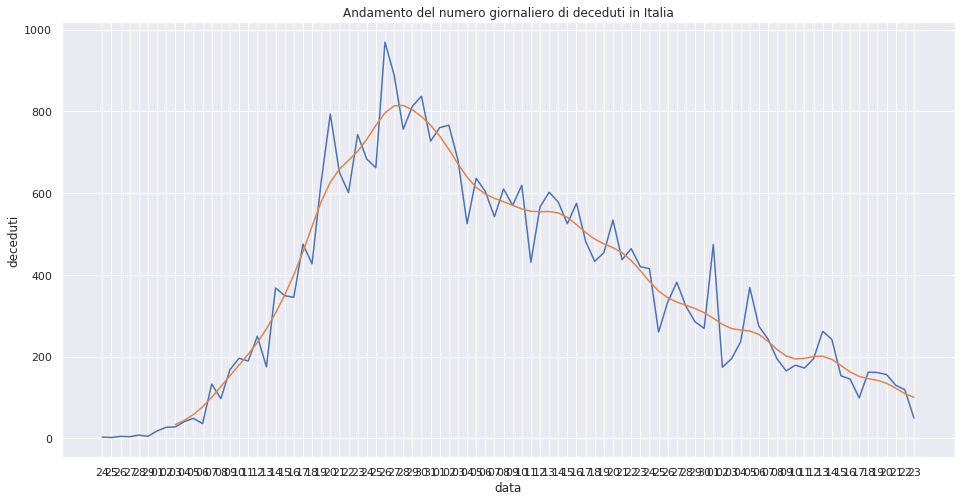

In [7]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['deceduti'].diff())
plot = sns.lineplot(x=naz['data'], y=filt(naz['deceduti'].diff(), sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero giornaliero di deceduti in Italia')
plt.savefig(figpath + 'deceduti_italia.png')

### Andamento nuovi positivi

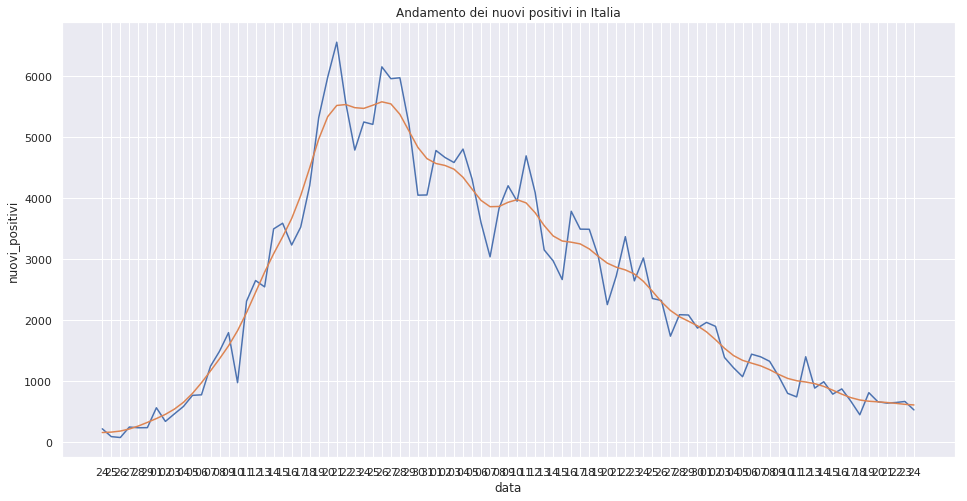

In [8]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['nuovi_positivi'])
plot = sns.lineplot(x=naz['data'], y=filt(naz['nuovi_positivi'], sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento dei nuovi positivi in Italia')
plt.savefig(figpath + 'nuovi_positivi_italia.png')

### Andamento variazione totale di positivi

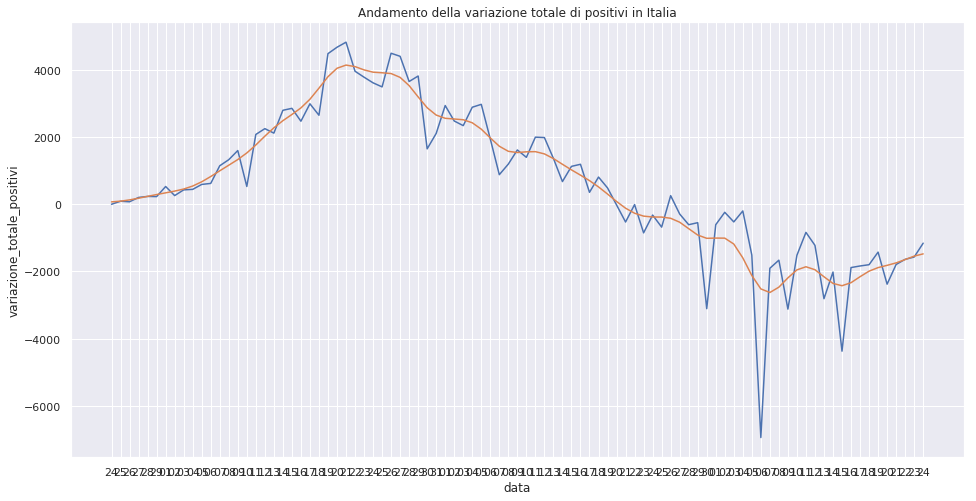

In [9]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['variazione_totale_positivi'])
plot = sns.lineplot(x=naz['data'], y=filt(naz['variazione_totale_positivi'], sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento della variazione totale di positivi in Italia')
plt.savefig(figpath + 'nuovi_positivi_italia.png')

### Andamento variazione totale di guariti

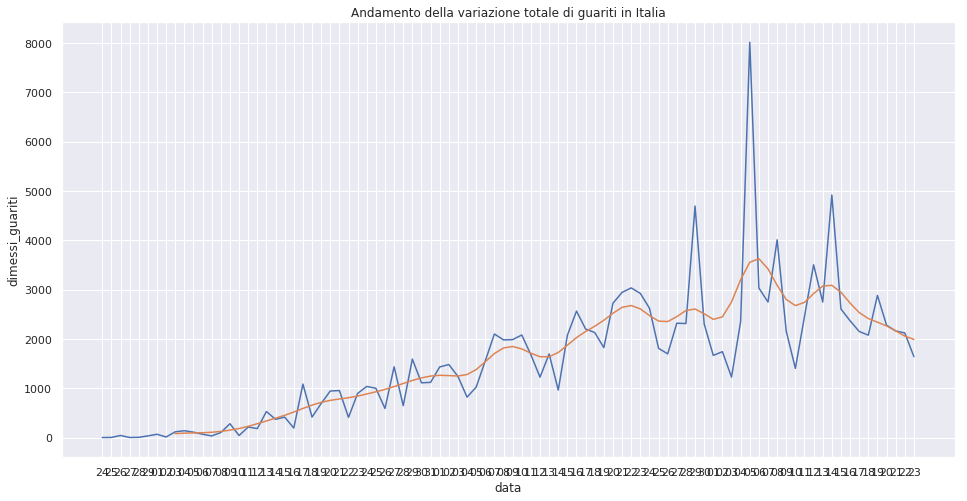

In [10]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['dimessi_guariti'].diff())
plot = sns.lineplot(x=naz['data'], y=filt(naz['dimessi_guariti'].diff(), sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento della variazione totale di guariti in Italia')
plt.savefig(figpath + 'guariti_italia.png')

### Andamento dei trattamenti per i pz positivi in Italia

<Figure size 1152x576 with 0 Axes>

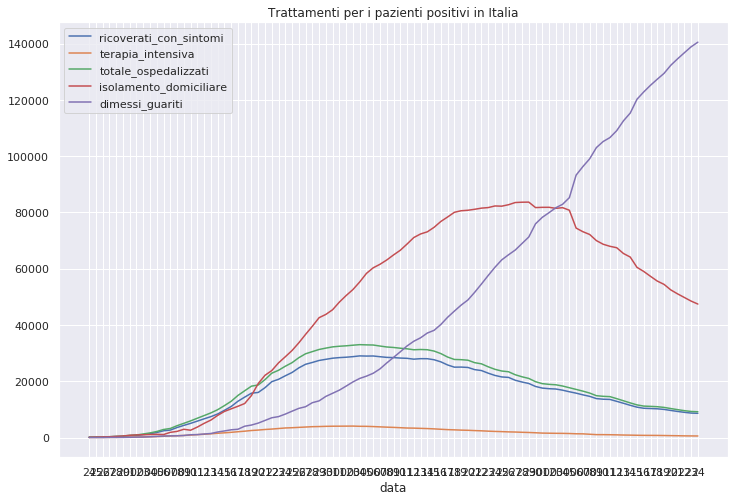

In [11]:
plt.figure(figsize=(16,8))
plot = naz.plot(x='data', y=['ricoverati_con_sintomi',
                             'terapia_intensiva', 
                             'totale_ospedalizzati',
                             'isolamento_domiciliare', 
                             'dimessi_guariti'], 
                xticks=np.arange(len(ticklabels)), figsize=(12,8))
plot.set_xticklabels(ticklabels)
plot.set_title('Trattamenti per i pazienti positivi in Italia')
plt.savefig(figpath + 'trattamenti_positivi_italia.png')

### Andamento tamponi fatti vs nuovi positivi in Italia

<Figure size 1152x576 with 0 Axes>

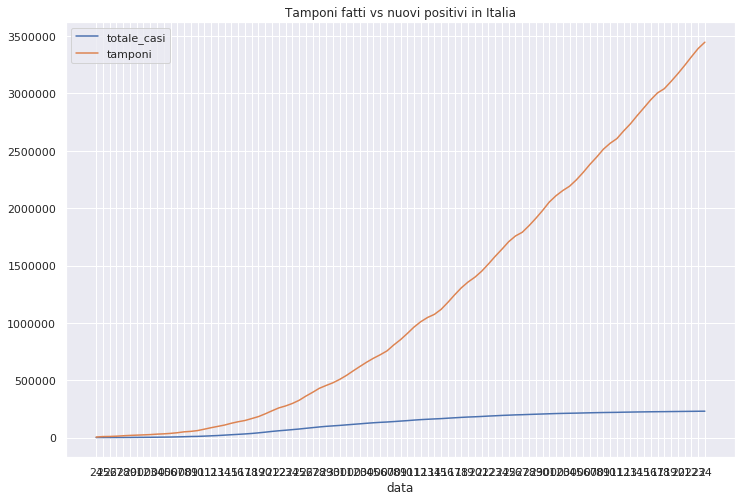

In [12]:
plt.figure(figsize=(16,8))
plot = naz.plot(x='data', y=['totale_casi','tamponi'], 
                xticks=np.arange(len(ticklabels)), figsize=(12,8))
plot.set_xticklabels(ticklabels)
plot.set_title('Tamponi fatti vs nuovi positivi in Italia')
plt.savefig(figpath + 'tamponi_italia.png')

### Andamento giornaliero del numero di pazienti in terapia intensiva

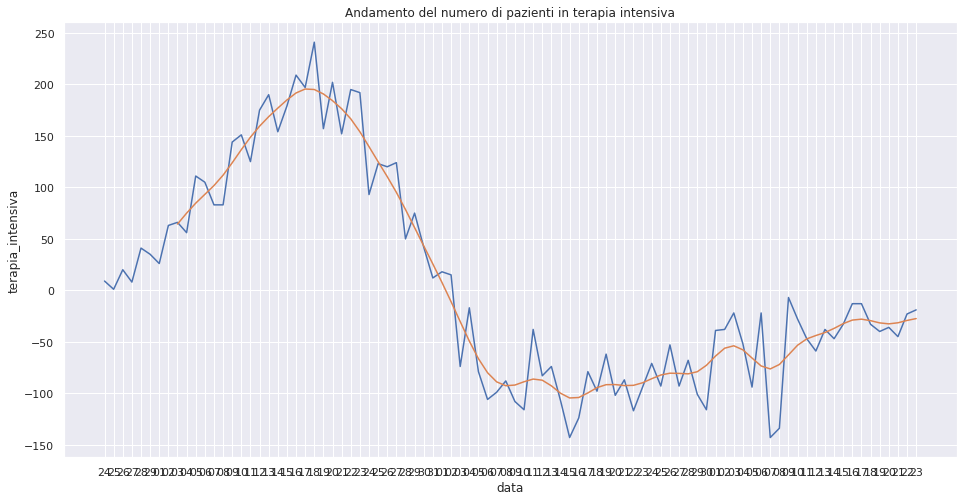

In [13]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['terapia_intensiva'].diff())
plot = sns.lineplot(x=naz['data'], y=filt(naz['terapia_intensiva'].diff(), sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di pazienti in terapia intensiva')
plt.savefig(figpath + 'ti_giornaliero_italia.png')

### Andamento giornaliero del numero di pazienti in isolamento domiciliare

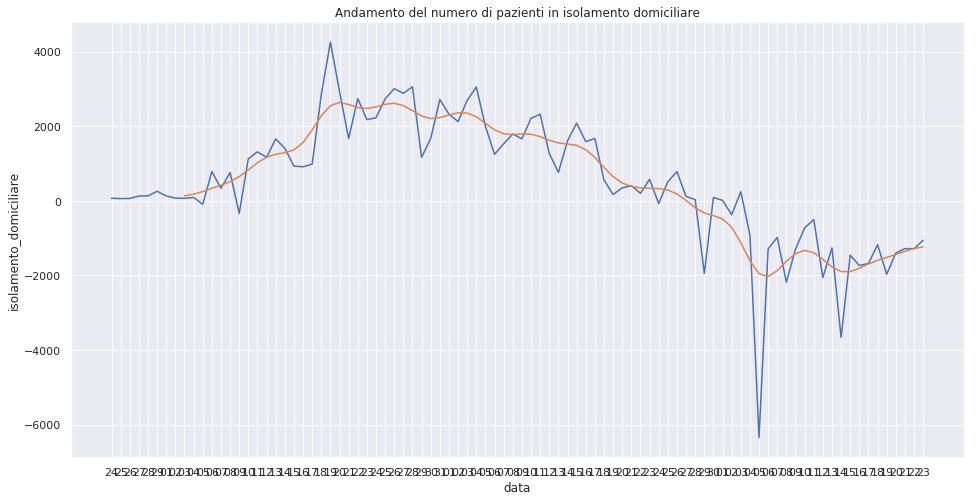

In [14]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=naz['data'], y=naz['isolamento_domiciliare'].diff())
plot = sns.lineplot(x=naz['data'], y=filt(naz['isolamento_domiciliare'].diff(), sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di pazienti in isolamento domiciliare')
plt.savefig(figpath + 'id_giornaliero_italia.png')

## Dati per provincia

In [15]:
list_province = []
for giorno in giorni:
    dataset = pd.read_csv(path + f'dati-province/dpc-covid19-ita-province-{giorno}.csv')
    list_province.append(dataset)
province = pd.concat(list_province)

### Provincia di Torino

In [16]:
torino = province[province['denominazione_provincia']=='Torino']

In [17]:
torino.keys()

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

### Andamento numero di casi in provincia di Torino

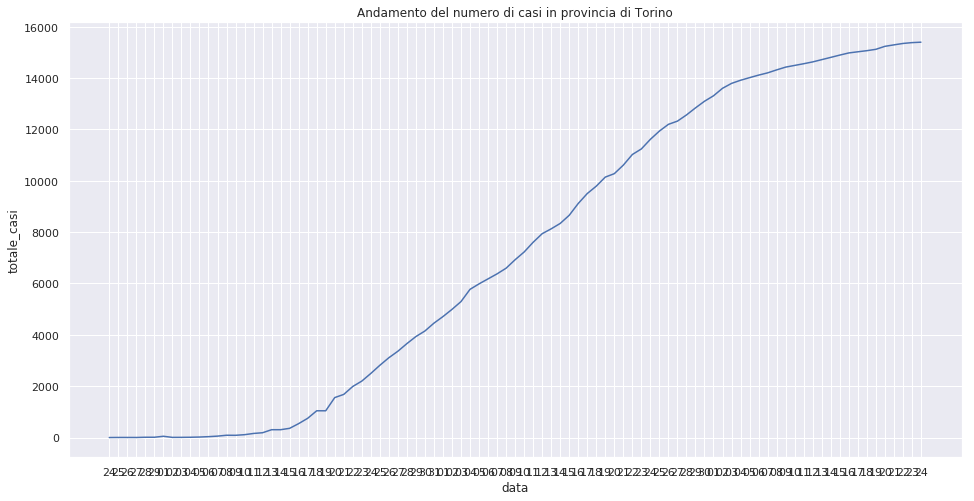

In [18]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=torino['data'], y=torino['totale_casi'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di casi in provincia di Torino')
plt.savefig(figpath + 'cum_casi_torino.png')

### Variazione giornaliera di casi in provincia di Torino

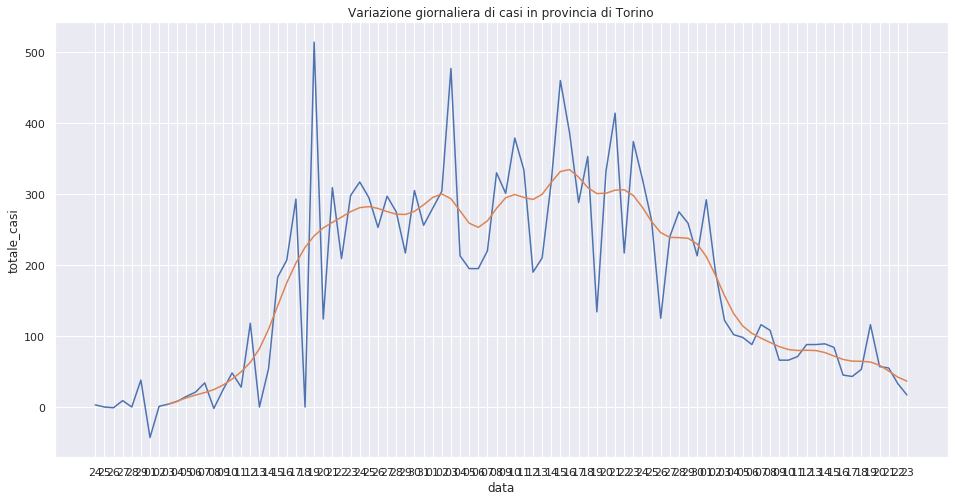

In [19]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=torino['data'], y=torino['totale_casi'].diff())
plot = sns.lineplot(x=torino['data'], y=filt(torino['totale_casi'].diff(), sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Variazione giornaliera di casi in provincia di Torino')
plt.savefig(figpath + 'incremento_giornaliero_casi_torino.png')

In [20]:
piemonte = province[province['denominazione_regione']=='Piemonte']
piemonte = piemonte[piemonte['denominazione_provincia'] != 'In fase di definizione/aggiornamento']

### Andamento numero di casi nelle province del Piemonte

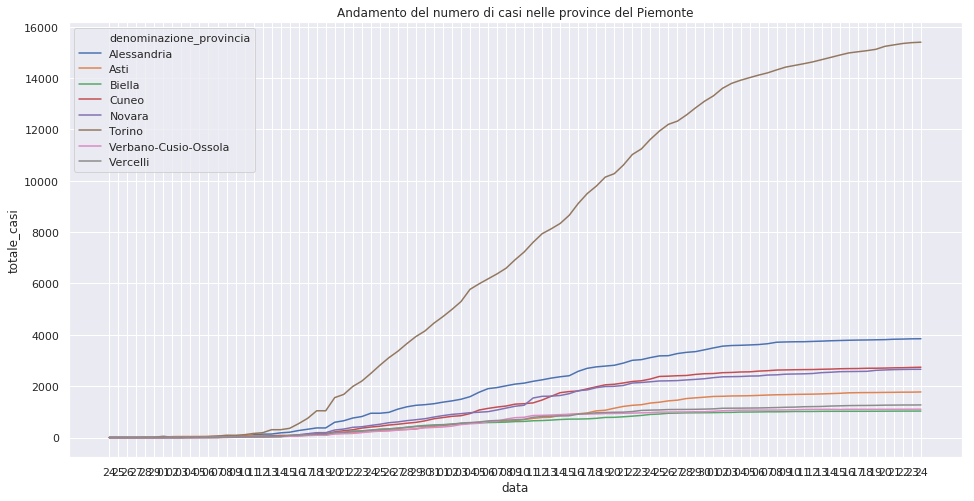

In [21]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=piemonte['data'], y=piemonte['totale_casi'], 
                    hue=piemonte['denominazione_provincia'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di casi nelle province del Piemonte')
plt.savefig(figpath + 'cum_casi_province_piemonte.png')

## Dati per regione - Piemonte

In [22]:
list_regioni = []
for giorno in giorni:
    dataset = pd.read_csv(path + f'dati-regioni/dpc-covid19-ita-regioni-{giorno}.csv')
    list_regioni.append(dataset)
regioni = pd.concat(list_regioni)

In [23]:
piemonte_reg = regioni[regioni['denominazione_regione']=='Piemonte']

In [24]:
piemonte_reg.keys()

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

### Andamento numero di nuovi casi in Piemonte

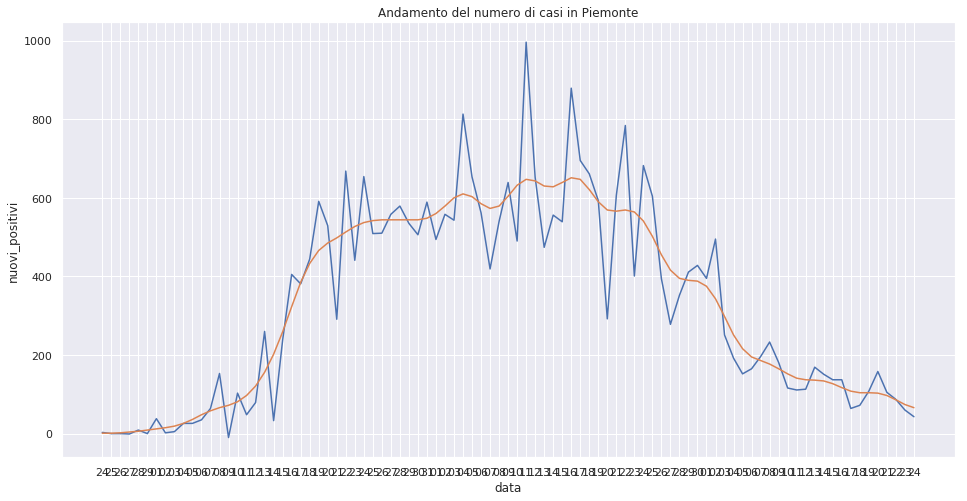

In [25]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=piemonte_reg['data'], y=piemonte_reg['nuovi_positivi'])
plot = sns.lineplot(x=piemonte_reg['data'], y=filt(piemonte_reg['nuovi_positivi'], sigma=2))
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di casi in Piemonte')
plt.savefig(figpath + 'cum_casi_piemonte.png')

### Andamento numero di ricoverati con sintomi in Piemonte

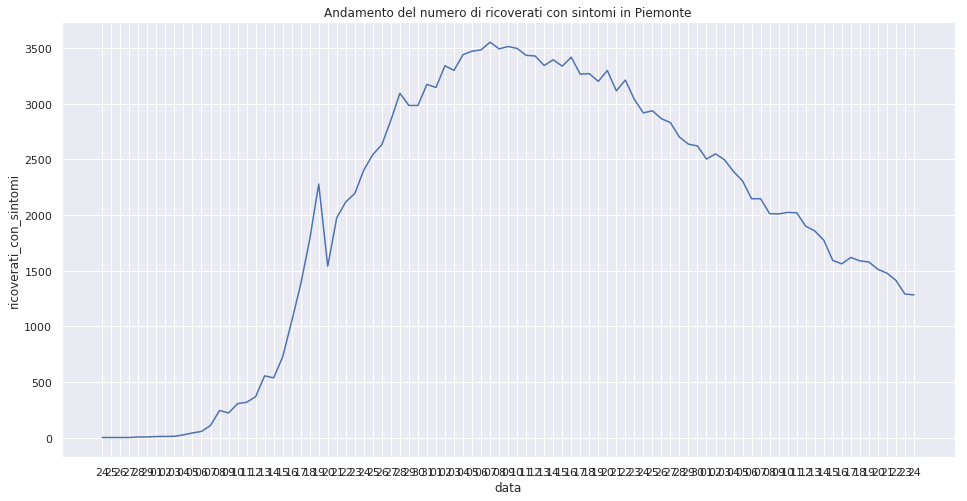

In [26]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=piemonte_reg['data'], y=piemonte_reg['ricoverati_con_sintomi'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di ricoverati con sintomi in Piemonte')
plt.savefig(figpath + 'ricoverati_sintomi_piemonte.png')

### Andamento positivi e terapie in Piemonte

In [27]:
trattamenti = piemonte_reg[['data',
                            'ricoverati_con_sintomi', 
                            'terapia_intensiva', 
                            'isolamento_domiciliare',
                            'totale_positivi']]

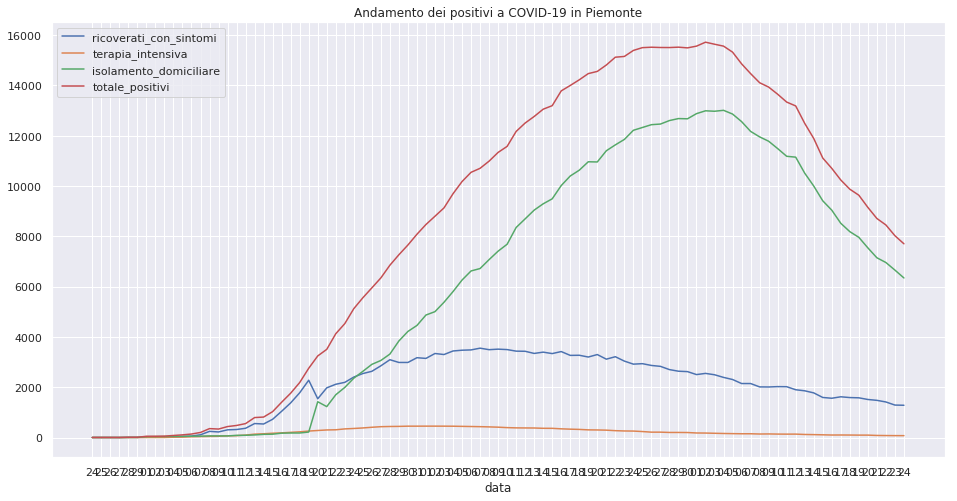

In [28]:
plot_trattamenti = trattamenti.plot(x='data', y=['ricoverati_con_sintomi', 
                                                 'terapia_intensiva', 
                                                 'isolamento_domiciliare',
                                                 'totale_positivi'], 
                                    xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_trattamenti.set_xticklabels(ticklabels)
plot_trattamenti.set_title('Andamento dei positivi a COVID-19 in Piemonte')
plt.savefig(figpath + 'trattamenti_positivi_piemonte.png')

### Andamento test in Piemonte

In [29]:
test = piemonte_reg[['data',
                     'totale_positivi',
                     'dimessi_guariti', 
                     'deceduti', 
                     'totale_casi', 
                     'tamponi',
                    'nuovi_positivi']]

<Figure size 864x576 with 0 Axes>

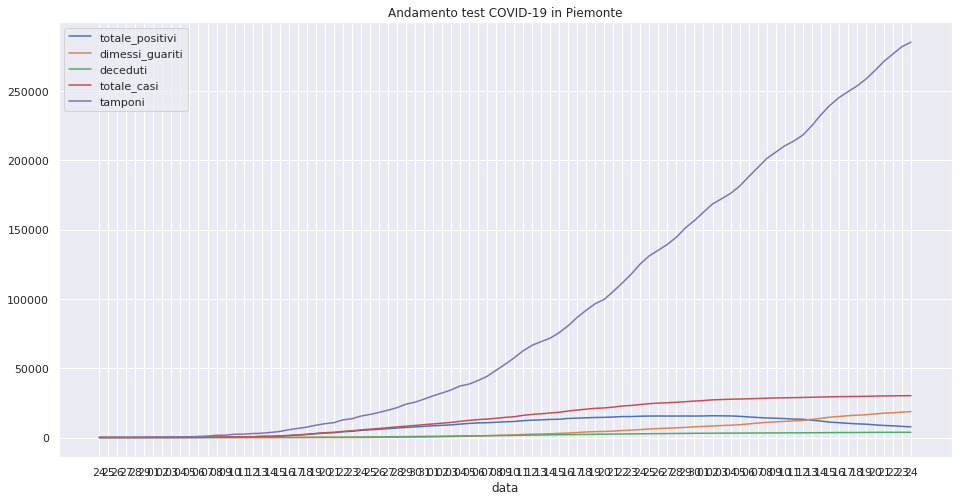

In [30]:
plt.figure(figsize=(12,8))
plot_test = test.plot(x='data', y=['totale_positivi',
                                   'dimessi_guariti', 
                                   'deceduti', 
                                   'totale_casi', 
                                   'tamponi'], 
                      xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_test.set_xticklabels(ticklabels)
plot_test.set_title('Andamento test COVID-19 in Piemonte')
plt.savefig(figpath + 'positivi_piemonte.png')

### Risultati tamponi in Piemonte

/home/stella/anaconda2/envs/patterns/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 1152x576 with 0 Axes>

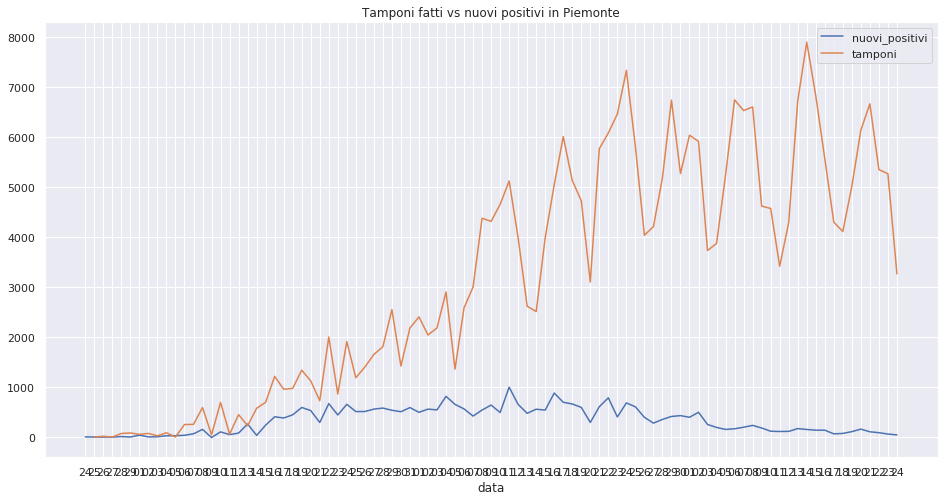

In [31]:
test['tamponi'] = test['tamponi'].diff()
plt.figure(figsize=(16,8))
plot_tamponi = test.plot(x='data', y=['nuovi_positivi','tamponi'], 
                         xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_tamponi.set_xticklabels(ticklabels)
plot_tamponi.set_title('Tamponi fatti vs nuovi positivi in Piemonte')
plt.savefig(figpath + 'tamponi_piemonte.png')

## Lombardia

In [32]:
lombardia_reg = regioni[regioni['denominazione_regione']=='Lombardia']

### Andamento positivi e terapie in Lombardia

In [33]:
trattamenti_lombardia = lombardia_reg[['data',
                                       'ricoverati_con_sintomi', 
                                       'terapia_intensiva', 
                                       'isolamento_domiciliare',
                                       'totale_positivi']]

<Figure size 1152x576 with 0 Axes>

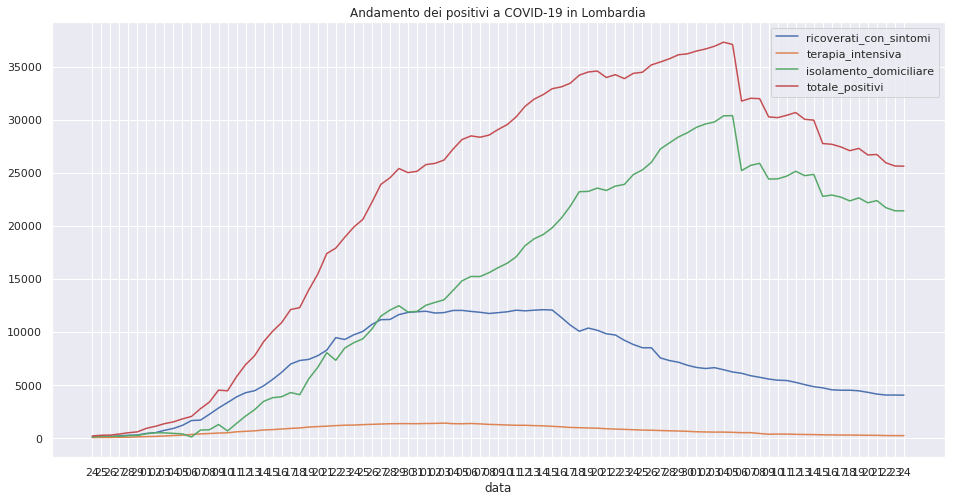

In [34]:
plt.figure(figsize=(16,8))
plot_trattamenti_lombardia = trattamenti_lombardia.plot(x='data', 
                                                        y=['ricoverati_con_sintomi', 
                                                           'terapia_intensiva', 
                                                           'isolamento_domiciliare',
                                                           'totale_positivi'], 
                                                        xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_trattamenti_lombardia.set_xticklabels(ticklabels)
plot_trattamenti_lombardia.set_title('Andamento dei positivi a COVID-19 in Lombardia')
plt.savefig(figpath + 'trattamenti_positivi_lombardia.png')

### Andamento test in Lombardia

In [35]:
test_lombardia = lombardia_reg[['data',
                                'totale_positivi', 
                                'nuovi_positivi',
                                'dimessi_guariti', 
                                'deceduti', 
                                'totale_casi', 
                                'tamponi']]

<Figure size 864x576 with 0 Axes>

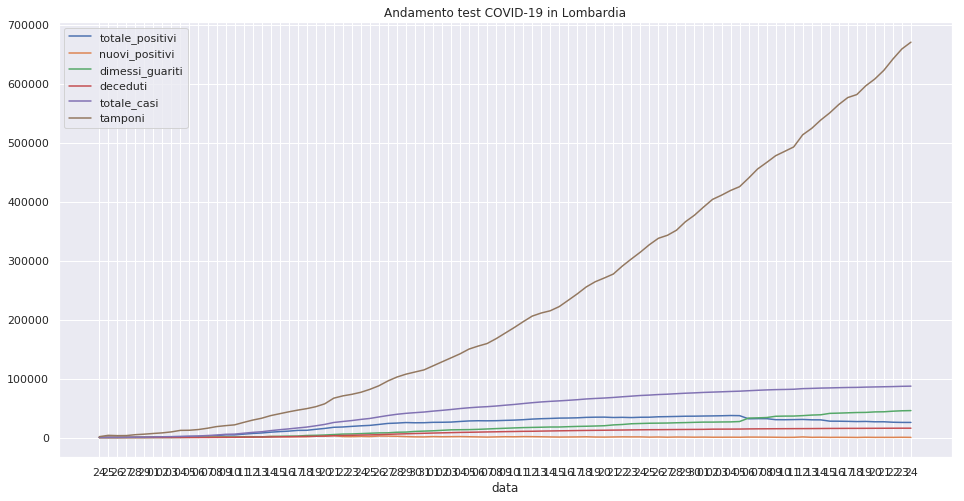

In [36]:
plt.figure(figsize=(12,8))
plot_test_lombardia = test_lombardia.plot(x='data', 
                                          y=['totale_positivi', 
                                             'nuovi_positivi',
                                             'dimessi_guariti', 
                                             'deceduti', 
                                             'totale_casi', 
                                             'tamponi'], 
                                          xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_test_lombardia.set_xticklabels(ticklabels)
plot_test_lombardia.set_title('Andamento test COVID-19 in Lombardia')
plt.savefig(figpath + 'positivi_lombardia.png')

### Risultati tamponi in Lombardia

In [37]:
test_lombardia['tamponi'] = test_lombardia['tamponi'].diff()

/home/stella/anaconda2/envs/patterns/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x576 with 0 Axes>

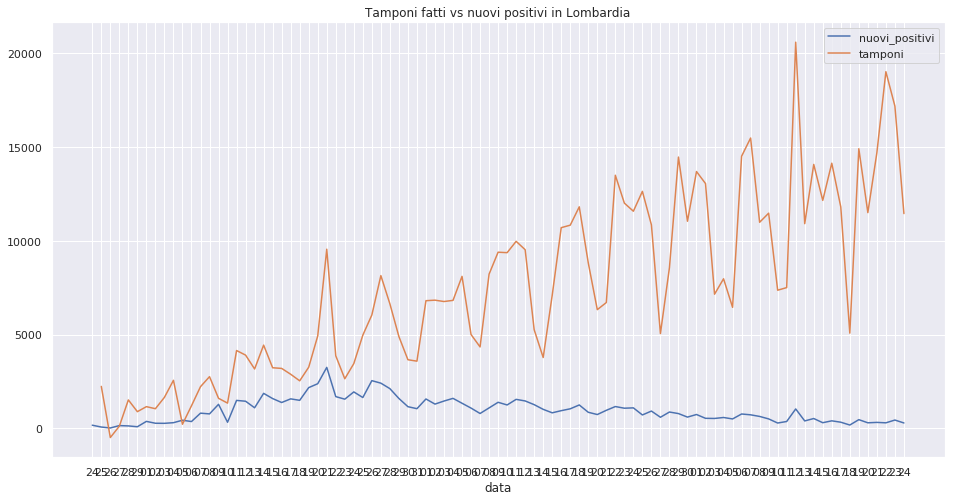

In [38]:
plt.figure(figsize=(12,8))
plot_tamponi_lombardia = test_lombardia.plot(x='data', 
                                             y=['nuovi_positivi','tamponi'], 
                                             xticks=np.arange(len(ticklabels)), figsize=(16,8))
plot_tamponi_lombardia.set_xticklabels(ticklabels)
plot_tamponi_lombardia.set_title('Tamponi fatti vs nuovi positivi in Lombardia')
plt.savefig(figpath + 'tamponi_lombardia.png')

### Andamento per Province in Lombardia

In [39]:
lombardia = province[province['denominazione_regione']=='Lombardia']
lombardia = lombardia[lombardia['denominazione_provincia'] != 'In fase di definizione/aggiornamento']
lombardia.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
48,2020-02-24T18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,0,NaN,NaN
49,2020-02-24T18:00:00,ITA,3,Lombardia,17,Brescia,BS,45.539931,10.219103,0,NaN,NaN
50,2020-02-24T18:00:00,ITA,3,Lombardia,13,Como,CO,45.809991,9.085160,0,NaN,NaN
51,2020-02-24T18:00:00,ITA,3,Lombardia,19,Cremona,CR,45.133367,10.024209,0,NaN,NaN
52,2020-02-24T18:00:00,ITA,3,Lombardia,97,Lecco,LC,45.855758,9.393392,0,NaN,NaN


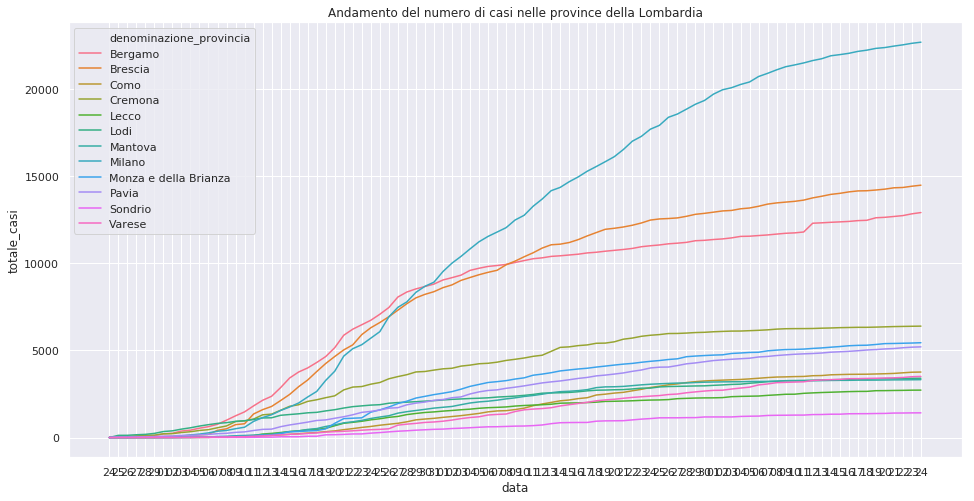

In [40]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=lombardia['data'], y=lombardia['totale_casi'], hue=lombardia['denominazione_provincia'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento del numero di casi nelle province della Lombardia')
plt.savefig(figpath + 'cum_casi_province_lombardia.png')

In [41]:
# preprocessing per ottenere l'incremento giornaliero per provincia
lombardia_select = lombardia[['data', 'totale_casi', 'denominazione_provincia']]
lombardia_select=lombardia_select.sort_values(['denominazione_provincia','data'])
gf=lombardia_select.groupby(['denominazione_provincia'])['totale_casi'].diff()
gf.fillna(0)
# aggiungo la colonna
lombardia_select['incremento_giornaliero'] = gf.values

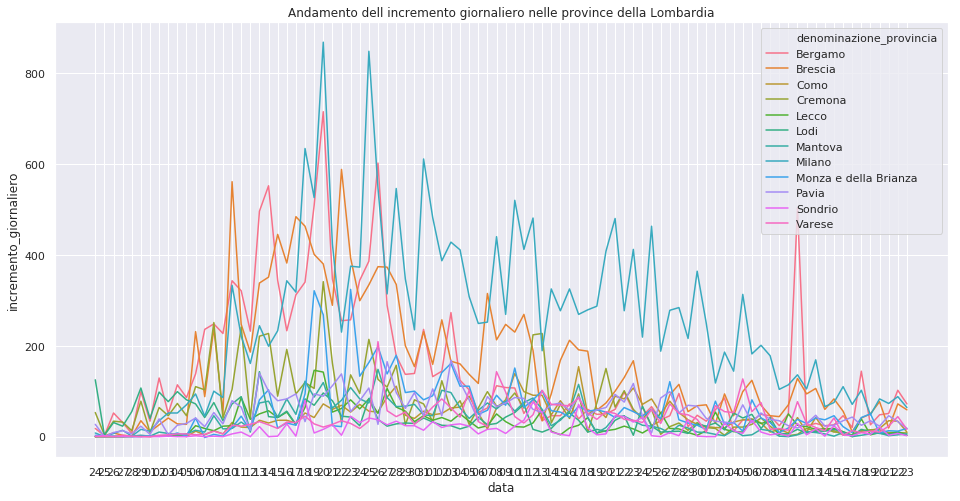

In [42]:
plt.figure(figsize=(16,8))
plot = sns.lineplot(x=lombardia_select['data'], 
                    y=lombardia_select['incremento_giornaliero'], 
                    hue=lombardia_select['denominazione_provincia'])
plot.set_xticklabels(ticklabels)
plot.set_title('Andamento dell incremento giornaliero nelle province della Lombardia')
plt.savefig(figpath + 'incremento_giornaliero_province_lombardia.png')

## Andamento Piemonte vs Lombardia vs Veneto vs Emilia Romagna

In [43]:
filtro_regioni = ['Lombardia', 'Piemonte', 'Veneto', 'Emilia-Romagna']
LPVE = regioni[regioni['denominazione_regione'].isin(filtro_regioni)]

### Andamento del numero di casi in Nord Italia (maggiori regioni)

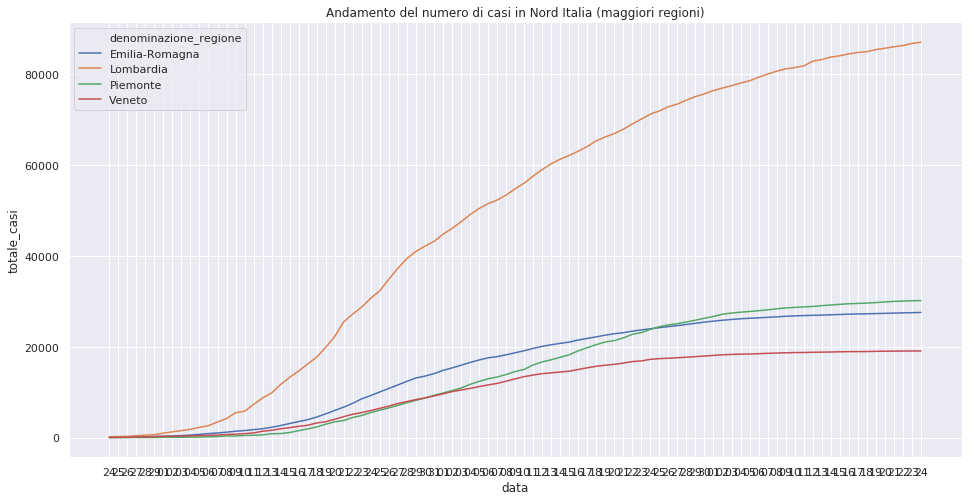

In [44]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['totale_casi'], hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Andamento del numero di casi in Nord Italia (maggiori regioni)')
plt.savefig(figpath + 'numero_casi_regioni_nord_italia.png')

### Andamento del numero di tamponi

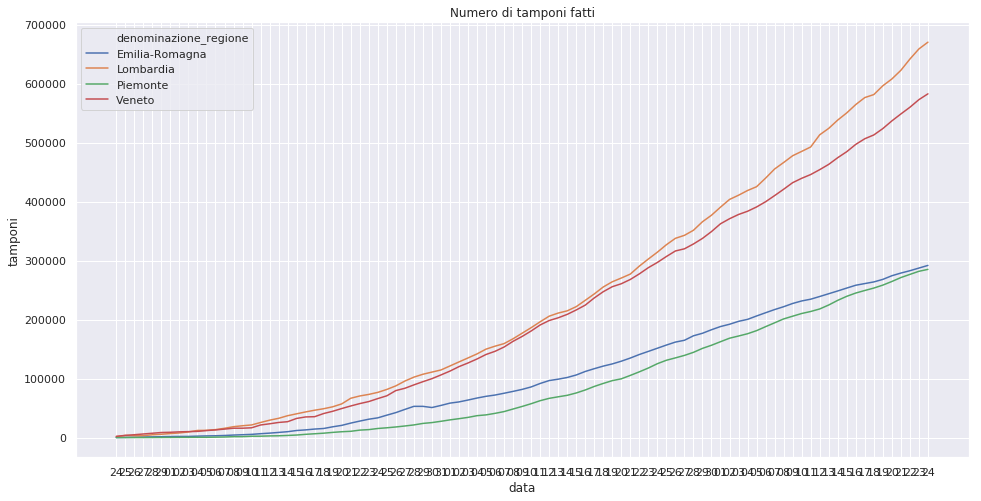

In [45]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['tamponi'], hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di tamponi fatti')
plt.savefig(figpath + 'tamponi_regioni_nord_italia.png')

### Incremento deceduti

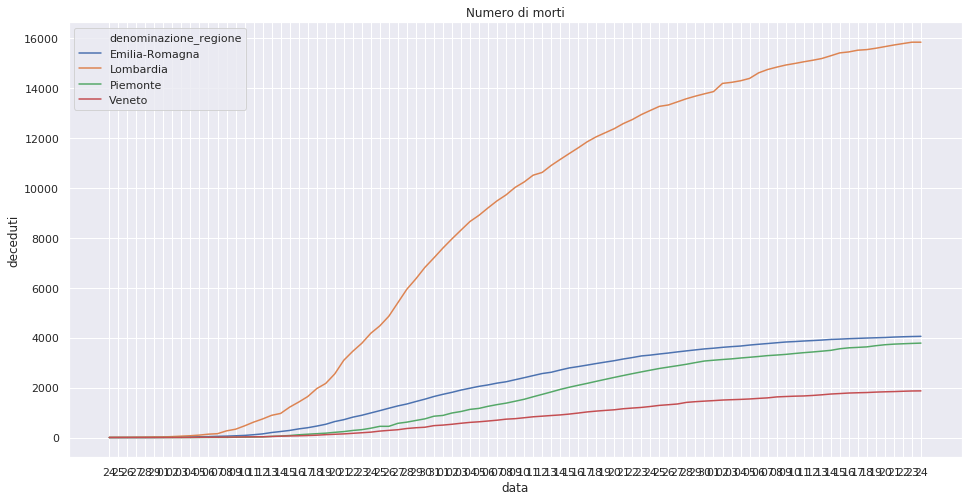

In [46]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['deceduti'], hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di morti')
plt.savefig(figpath + 'deceduti_regioni_nord_italia.png')

### Incremento numero ricoverati con sintomi

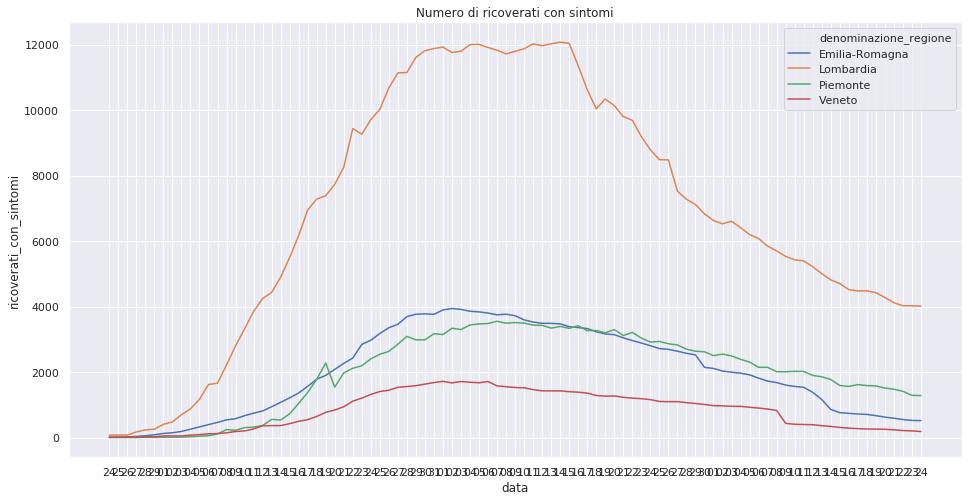

In [47]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['ricoverati_con_sintomi'], 
                         hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di ricoverati con sintomi')
plt.savefig(figpath + 'ricoverati_sintomi_regioni_nord_italia.png')

### Andamento numero di persone in isolamento domiciliare

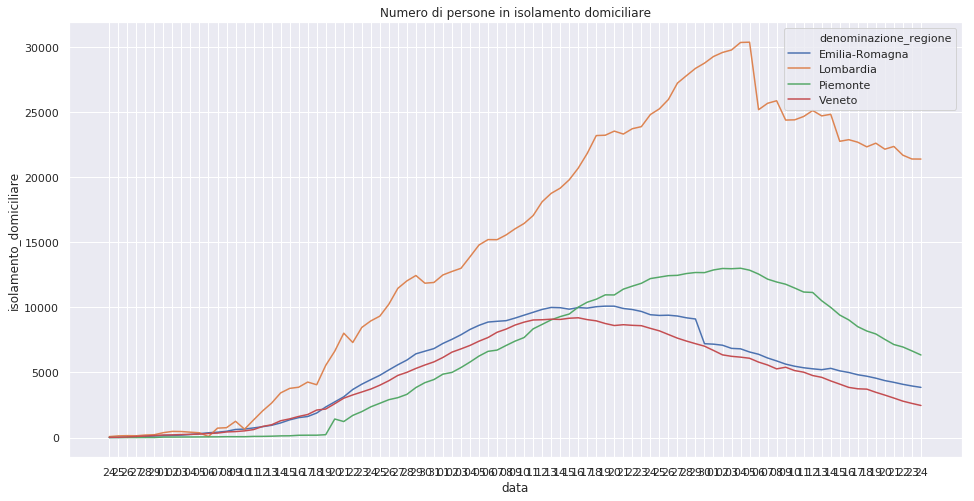

In [48]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['isolamento_domiciliare'], 
                         hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di persone in isolamento domiciliare')
plt.savefig(figpath + 'isolamento_domiciliare_regioni_nord_italia.png')

### Andamento numero di nuovi attualmente positivi

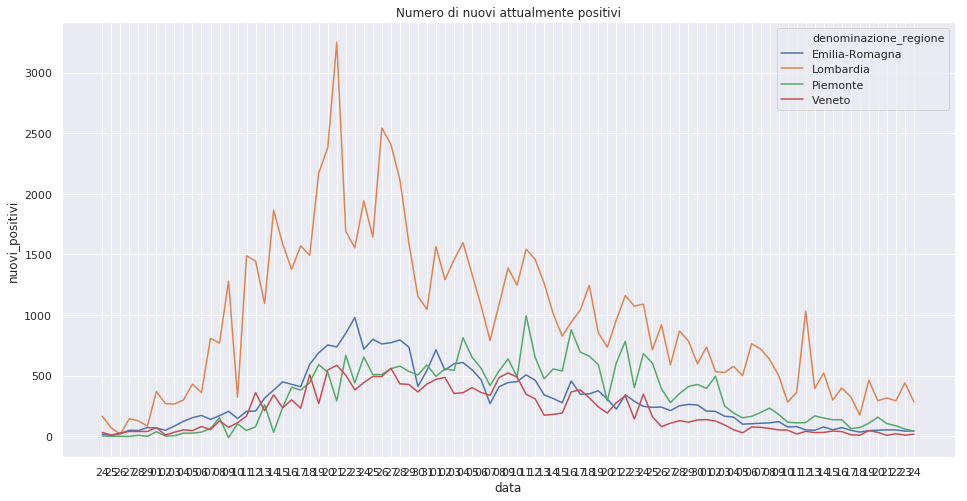

In [49]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['nuovi_positivi'], 
                         hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di nuovi attualmente positivi')
plt.savefig(figpath + 'nuovi_positivi_regioni_nord_italia.png')

### Andamento numero di dimessi guariti

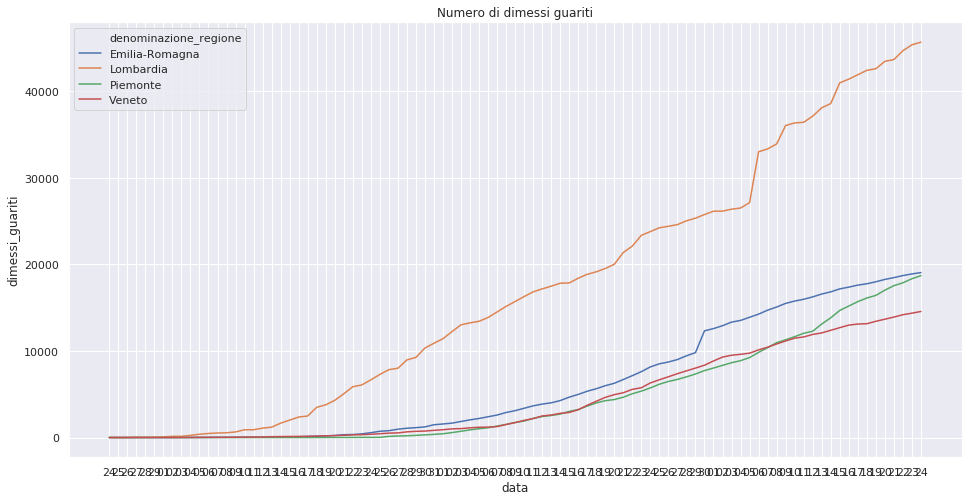

In [50]:
plt.figure(figsize=(16,8))
plot_LPVE = sns.lineplot(x=LPVE['data'], y=LPVE['dimessi_guariti'], 
                         hue=LPVE['denominazione_regione'])
plot_LPVE.set_xticklabels(ticklabels)
plot_LPVE.set_title('Numero di dimessi guariti')
plt.savefig(figpath + 'dimessi_guariti_regioni_nord_italia.png')